In [99]:
import os
import sys
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(1, os.path.join(sys.path[0], '..'))

from scheduler.plot import Plot
from scheduler.parser import parse_arguments

In [100]:
filenames=[
    "2022-07-27_052241__latency_0_max_servers_10_timesteps_24",
    "2022-07-27_052241__latency_25_max_servers_10_timesteps_24",
    "2022-07-27_052241__latency_50_max_servers_10_timesteps_24",
]   
conf = parse_arguments(["-m", "-1", "-l", "-1", "-c", "-1"])
dfs = [pd.read_csv(f"../saved/{name}.csv") for name in filenames]
dfs_grouped_by_timestep = [df.groupby("timestep") for df in dfs]

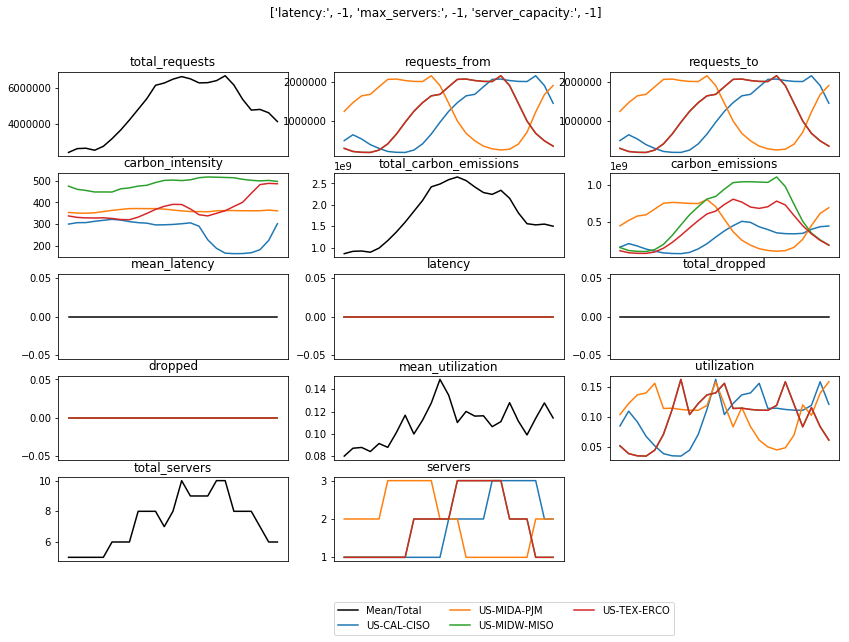

In [101]:
plot = Plot(conf)
plot.plot(df=dfs[0])

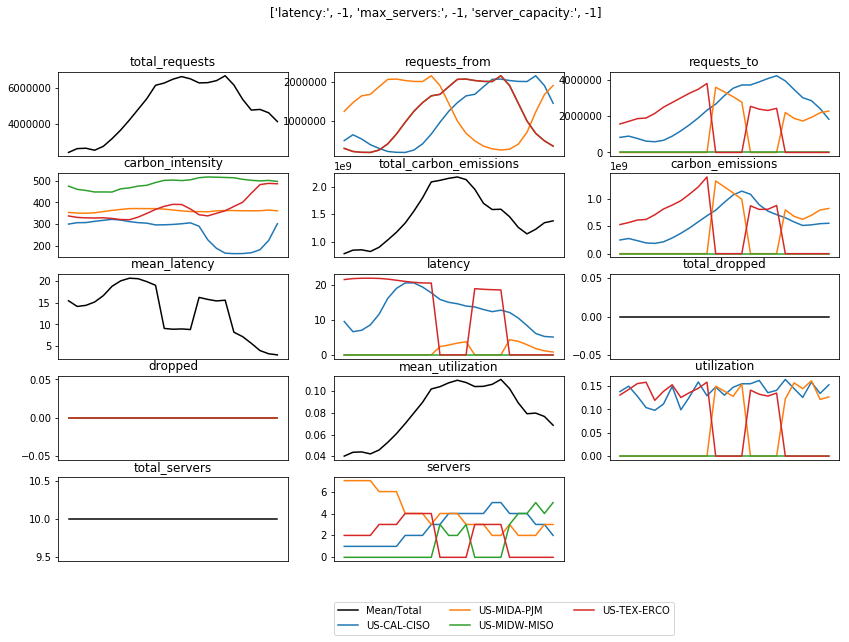

In [102]:
plot.plot(df=dfs[1])

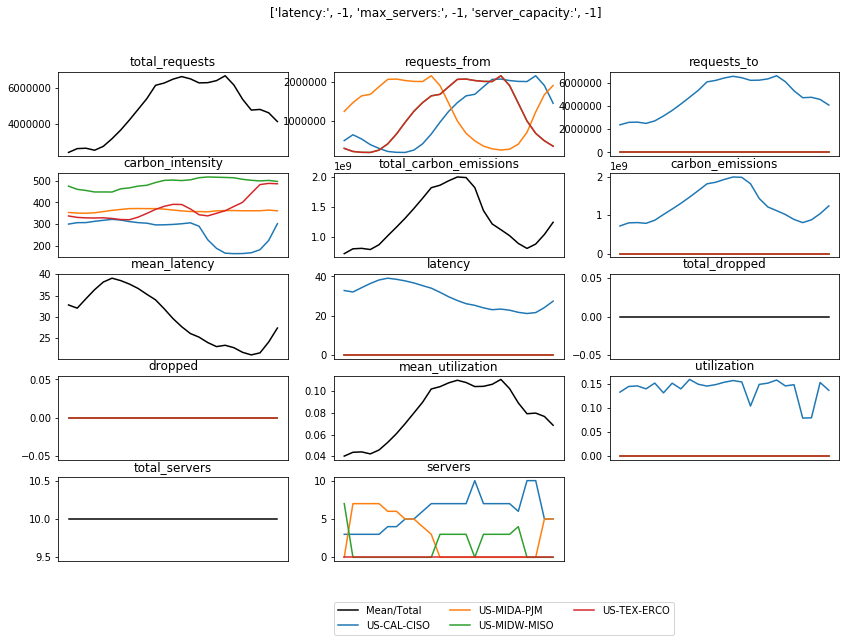

In [103]:
plot.plot(df=dfs[2])

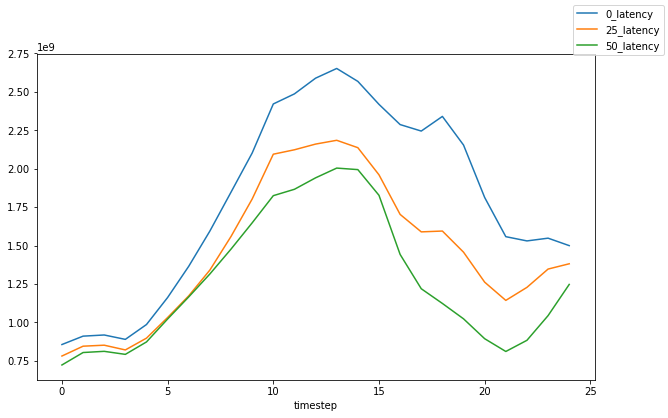

In [104]:
ax = None
fig = plt.figure(figsize=(10,6))
for df in dfs_grouped_by_timestep:
    ax = df["total_carbon_emissions"].sum().plot(ax=ax)
fig.legend(["0_latency", "25_latency", "50_latency"]);

c:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


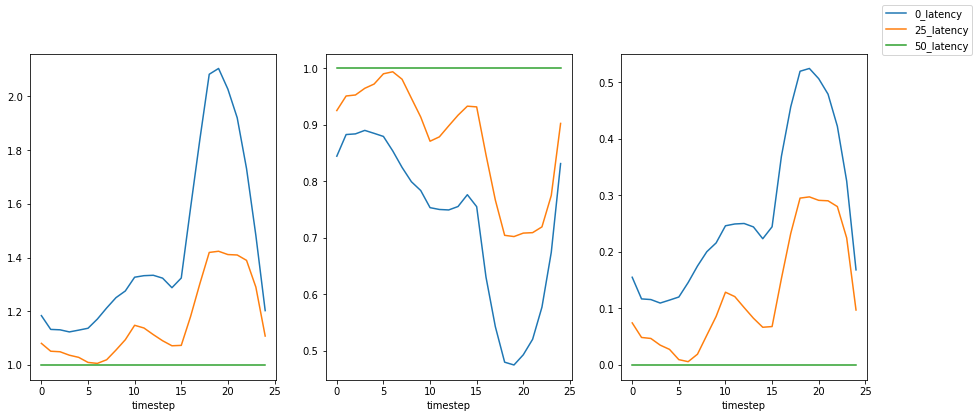

In [105]:
ax = None
fig = plt.figure(figsize=(15, 6))
factor = dfs_grouped_by_timestep[2]["total_carbon_emissions"].sum()
for df in dfs_grouped_by_timestep:
    ax = plt.subplot(1, 3, 1)
    p = df["total_carbon_emissions"].sum() / factor
    ax = p.plot(ax=ax)
    ax = plt.subplot(1, 3, 2)
    p =  factor / df["total_carbon_emissions"].sum()
    ax = p.plot(ax=ax)
    ax = plt.subplot(1, 3, 3)
    p =  1 - factor / df["total_carbon_emissions"].sum()
    ax = p.plot(ax=ax)


fig.legend(["0_latency", "25_latency", "50_latency"]);

TypeError: inner() got multiple values for argument 'ax'

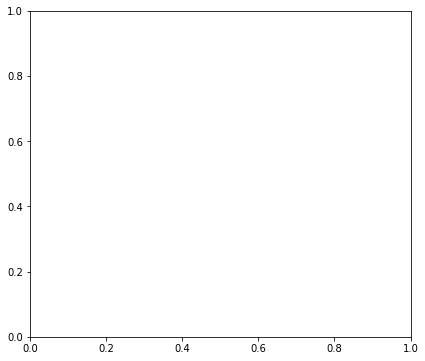

In [106]:

#print(dfs)
ax = None
fig = plt.figure(figsize=(15, 6))

carbon_emission_sums = []
for df in dfs_grouped_by_timestep:
    sum =  carbon_emission_sums.append(df["total_carbon_emissions"].sum().sum())
    ax = plt.subplot(1, 2, 1)
    ax.plt.bar(["0_latency", "25_latency", "50_latency"], carbon_emission_sums)

factor = dfs_grouped_by_timestep[2]["total_carbon_emissions"].sum()

for df in dfs_grouped_by_timestep:
    ax = plt.subplot(1, 3, 3)
    p =  1 - factor / df["total_carbon_emissions"].sum()
    ax = p.plot(ax=ax)

    